<a href="https://colab.research.google.com/github/ananthikalogu/codealpha/blob/main/code_alpha_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sample_sales_data.xlsx to sample_sales_data (2).xlsx
Dataset Shape: (20, 7)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   OrderID   20 non-null     int64         
 1   Customer  20 non-null     object        
 2   Product   20 non-null     object        
 3   Category  20 non-null     object        
 4   Quantity  20 non-null     int64         
 5   Price     20 non-null     int64         
 6   Date      20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.2+ KB
None

First 5 rows:

   OrderID Customer     Product     Category  Quantity  Price       Date
0        1    Alice      Laptop  Electronics         2    800 2023-01-01
1        2      Bob       Phone  Electronics         1    500 2023-01-02
2        3  Charlie      Tablet  Electronics         3    300 2023-01-03
3  

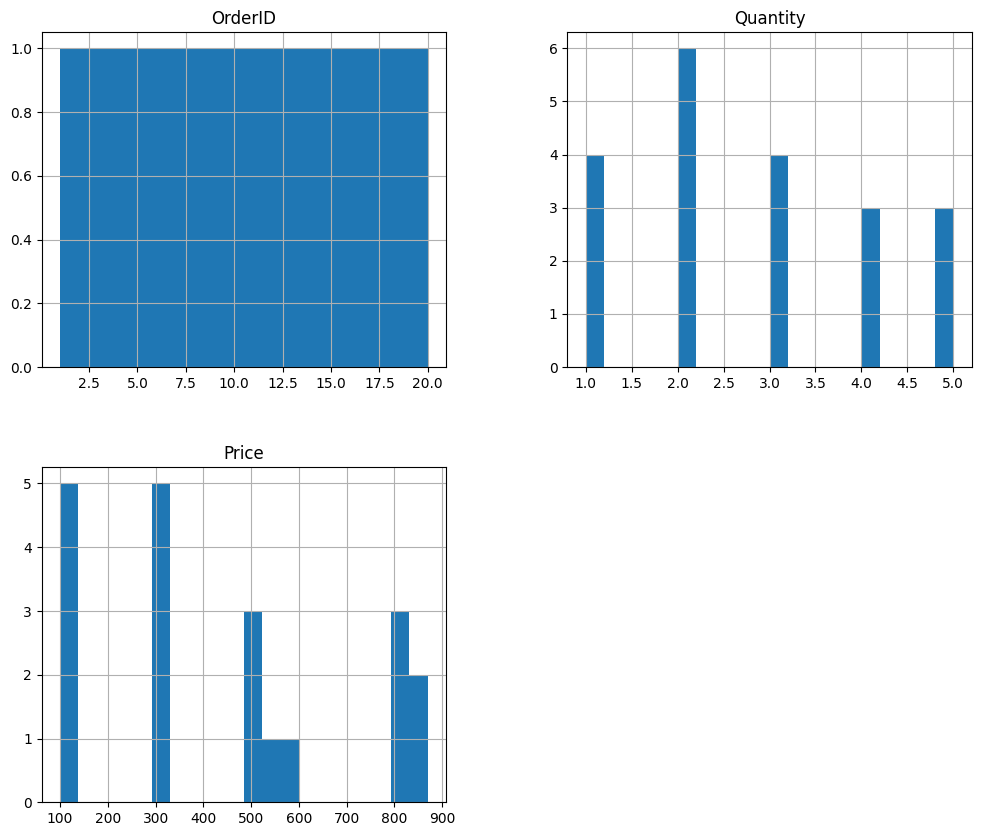

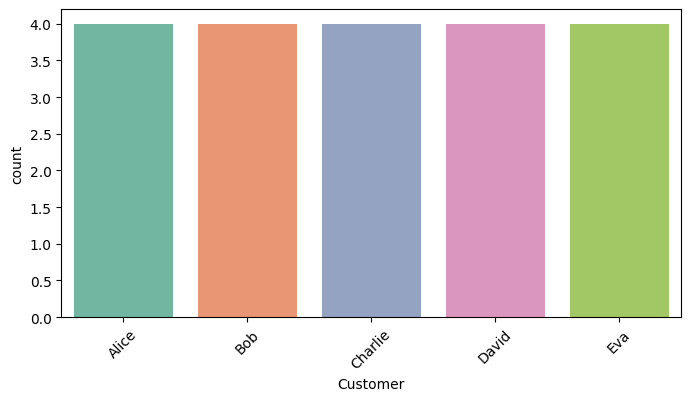

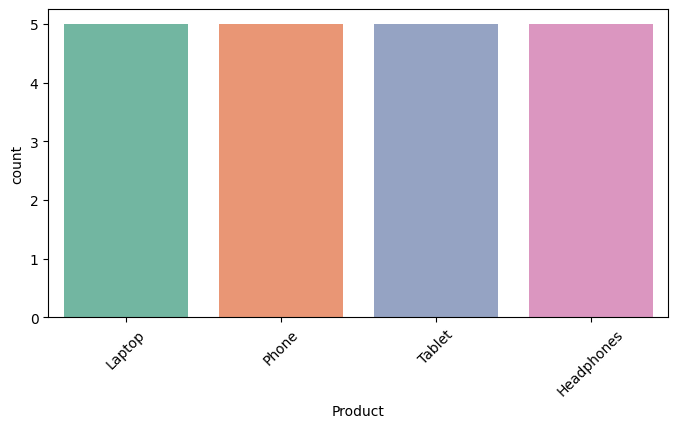

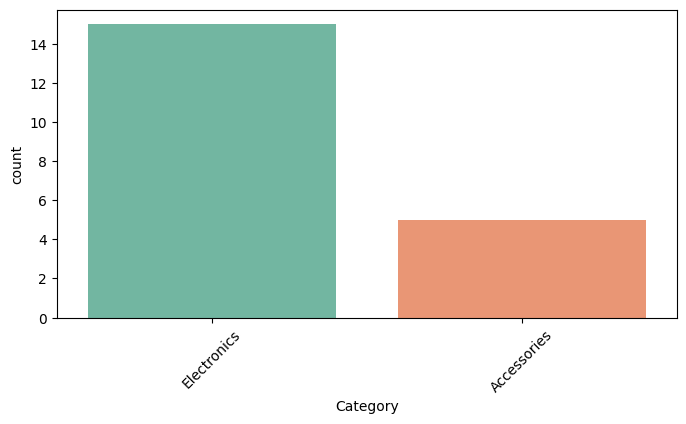

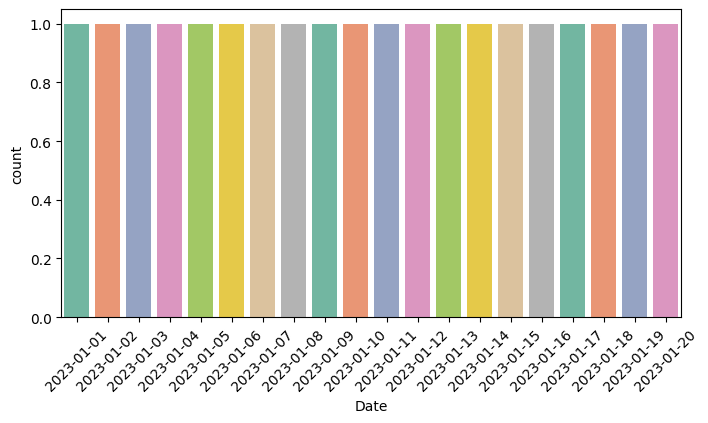

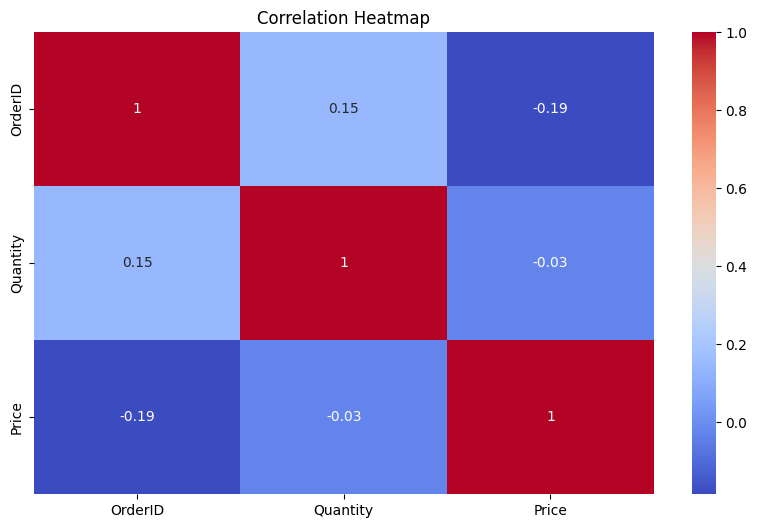

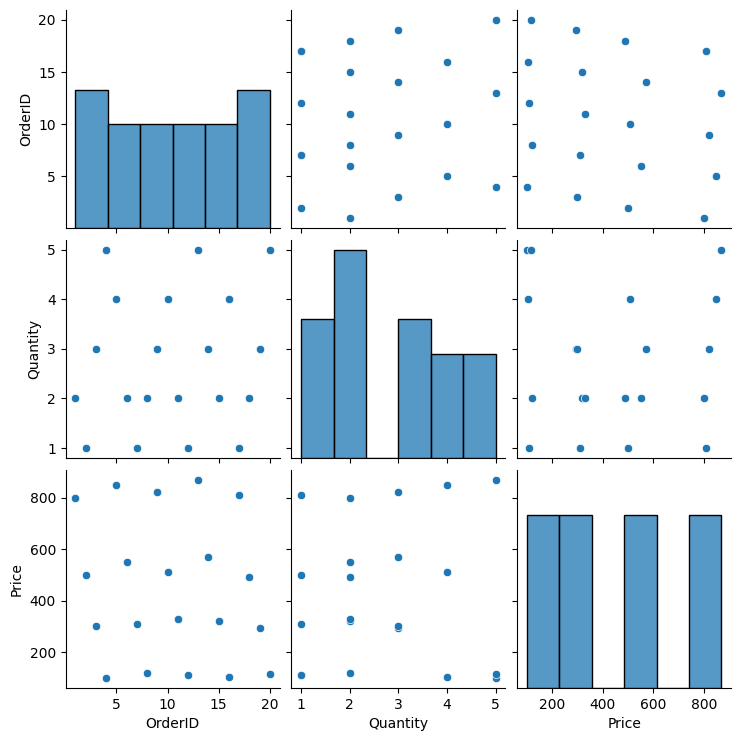

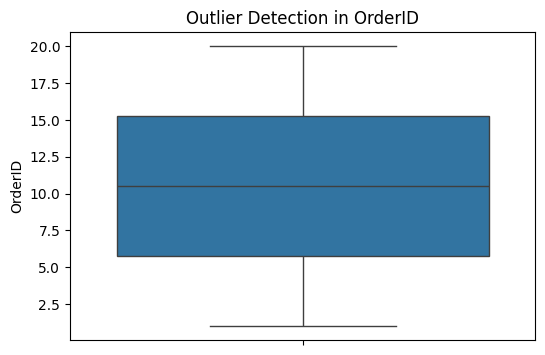

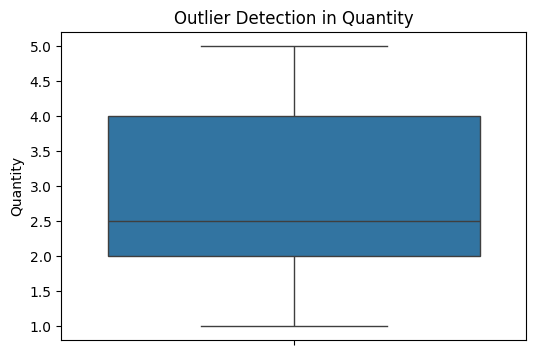

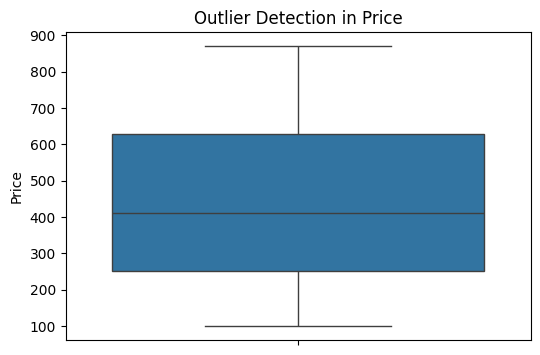


T-test between Alice and Bob on OrderID:
T-statistic: -0.21908902300206645 P-value: 0.8338434199212101

🔎 Potential Data Issues:
- Missing values found in columns: []
- Duplicate rows: 0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


from google.colab import files
uploaded = files.upload()

df = pd.read_excel("sample_sales_data.xlsx")

print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())
print("\nFirst 5 rows:\n")
print(df.head())
print("\nMissing Values:\n")
print(df.isnull().sum())


print("\nDescriptive Stats:\n")
print(df.describe(include="all"))

for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique Values: {df[col].nunique()}")

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

df[num_cols].hist(figsize=(12,10), bins=20)
plt.show()

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False)
    plt.xticks(rotation=45)
    plt.show() # Added plt.show() here to display each categorical plot

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

if len(num_cols) >= 2:
    sns.pairplot(df[num_cols].sample(min(len(df), 200)))

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Outlier Detection in {col}")
    plt.show()

from scipy.stats import ttest_ind

if len(cat_cols) > 0 and len(num_cols) > 0:
    cat = cat_cols[0]
    num = num_cols[0]
    categories = df[cat].dropna().unique()
    if len(categories) >= 2:
        group1 = df[df[cat] == categories[0]][num]
        group2 = df[df[cat] == categories[1]][num]
        t_stat, p_val = ttest_ind(group1, group2, nan_policy="omit")
        print(f"\nT-test between {categories[0]} and {categories[1]} on {num}:")
        print("T-statistic:", t_stat, "P-value:", p_val)


print("\n🔎 Potential Data Issues:")
print("- Missing values found in columns:", df.columns[df.isnull().any()].tolist())
print("- Duplicate rows:", df.duplicated().sum())